In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("../processed-datasets/feature-dataset.csv", sep='$')

df.head()

sns.set(style="whitegrid")

In [37]:
df.groupby(['class']).count()

,url,status_code,meta_info,length,nb_hyphen,nb_cdn,nb_digits,nb_adword,nb_subdomains
class,,,,,,,,,
0,43609,43609,43609,43609,43609,43609,43609,43609,43609
1,30589,30589,30589,30589,30589,30589,30589,30589,30589


TypeError: can't multiply sequence by non-int of type 'float'

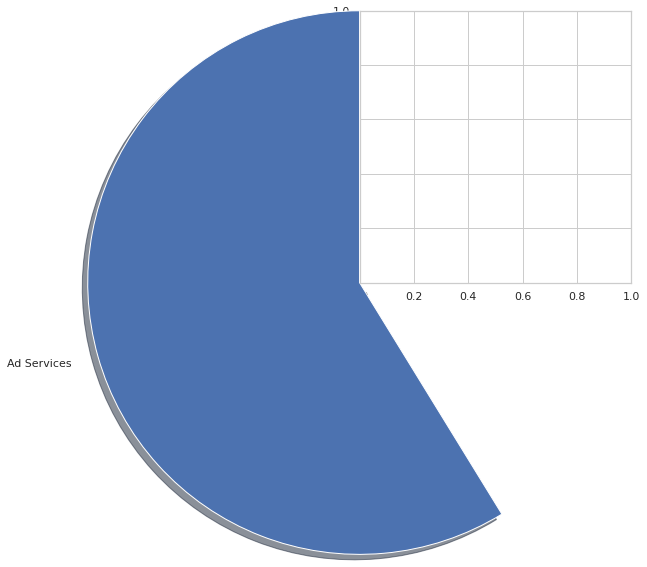

In [44]:
fig, ax_ = plt.subplots(figsize = (20,5))

explode = (0.09, 0.09)

ax_.pie(x = df.groupby(['class']).count()['url'],
        labels = ['Ad Services', 'Normal Domains'], shadow = True,  
        pctdistance = '%10f%%',autopct='%1.1f%%', explode=[0,0,0,0.1,], startangle=90)

ax_. set_title('Class Distribution', fontsize = 15);

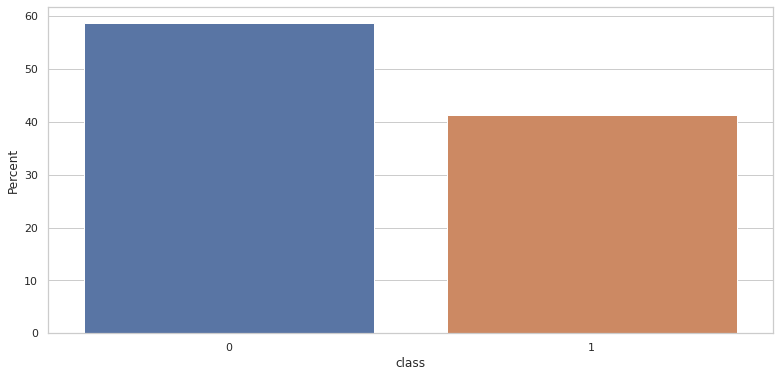

In [46]:
plt.figure(figsize=(13, 6))
ax = sns.barplot(x="class", y="class", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent");
plt.savefig('../graphs/class-distribution.png', dpi=800, bbox_inches='tight');

In [49]:
df["length"].describe()

count    74198.000000
mean        28.919027
std         22.341916
min         13.000000
25%         23.000000
50%         27.000000
75%         32.000000
max       1227.000000
Name: length, dtype: float64

In [27]:
df.columns

Index(['class', 'url', 'status_code', 'meta_info', 'length', 'nb_hyphen',
       'nb_cdn', 'nb_digits', 'nb_adword', 'nb_subdomains'],
      dtype='object')

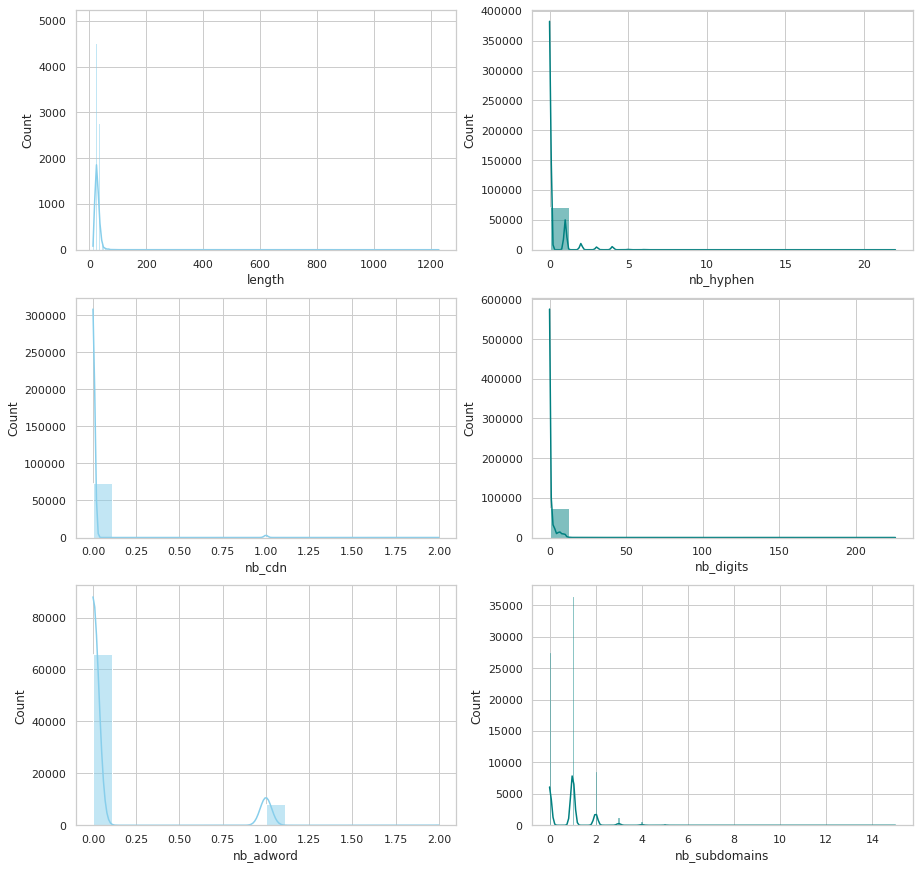

In [36]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(data=df, x="length", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="nb_hyphen", kde=True, color="teal", ax=axs[0, 1])

sns.histplot(data=df, x="nb_cdn", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df, x="nb_digits", kde=True, color="teal", ax=axs[1, 1])

sns.histplot(data=df, x="nb_adword", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df, x="nb_subdomains", kde=True, color="teal", ax=axs[2, 1])
plt.show()

/tmp/ipykernel_1776/4069292894.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


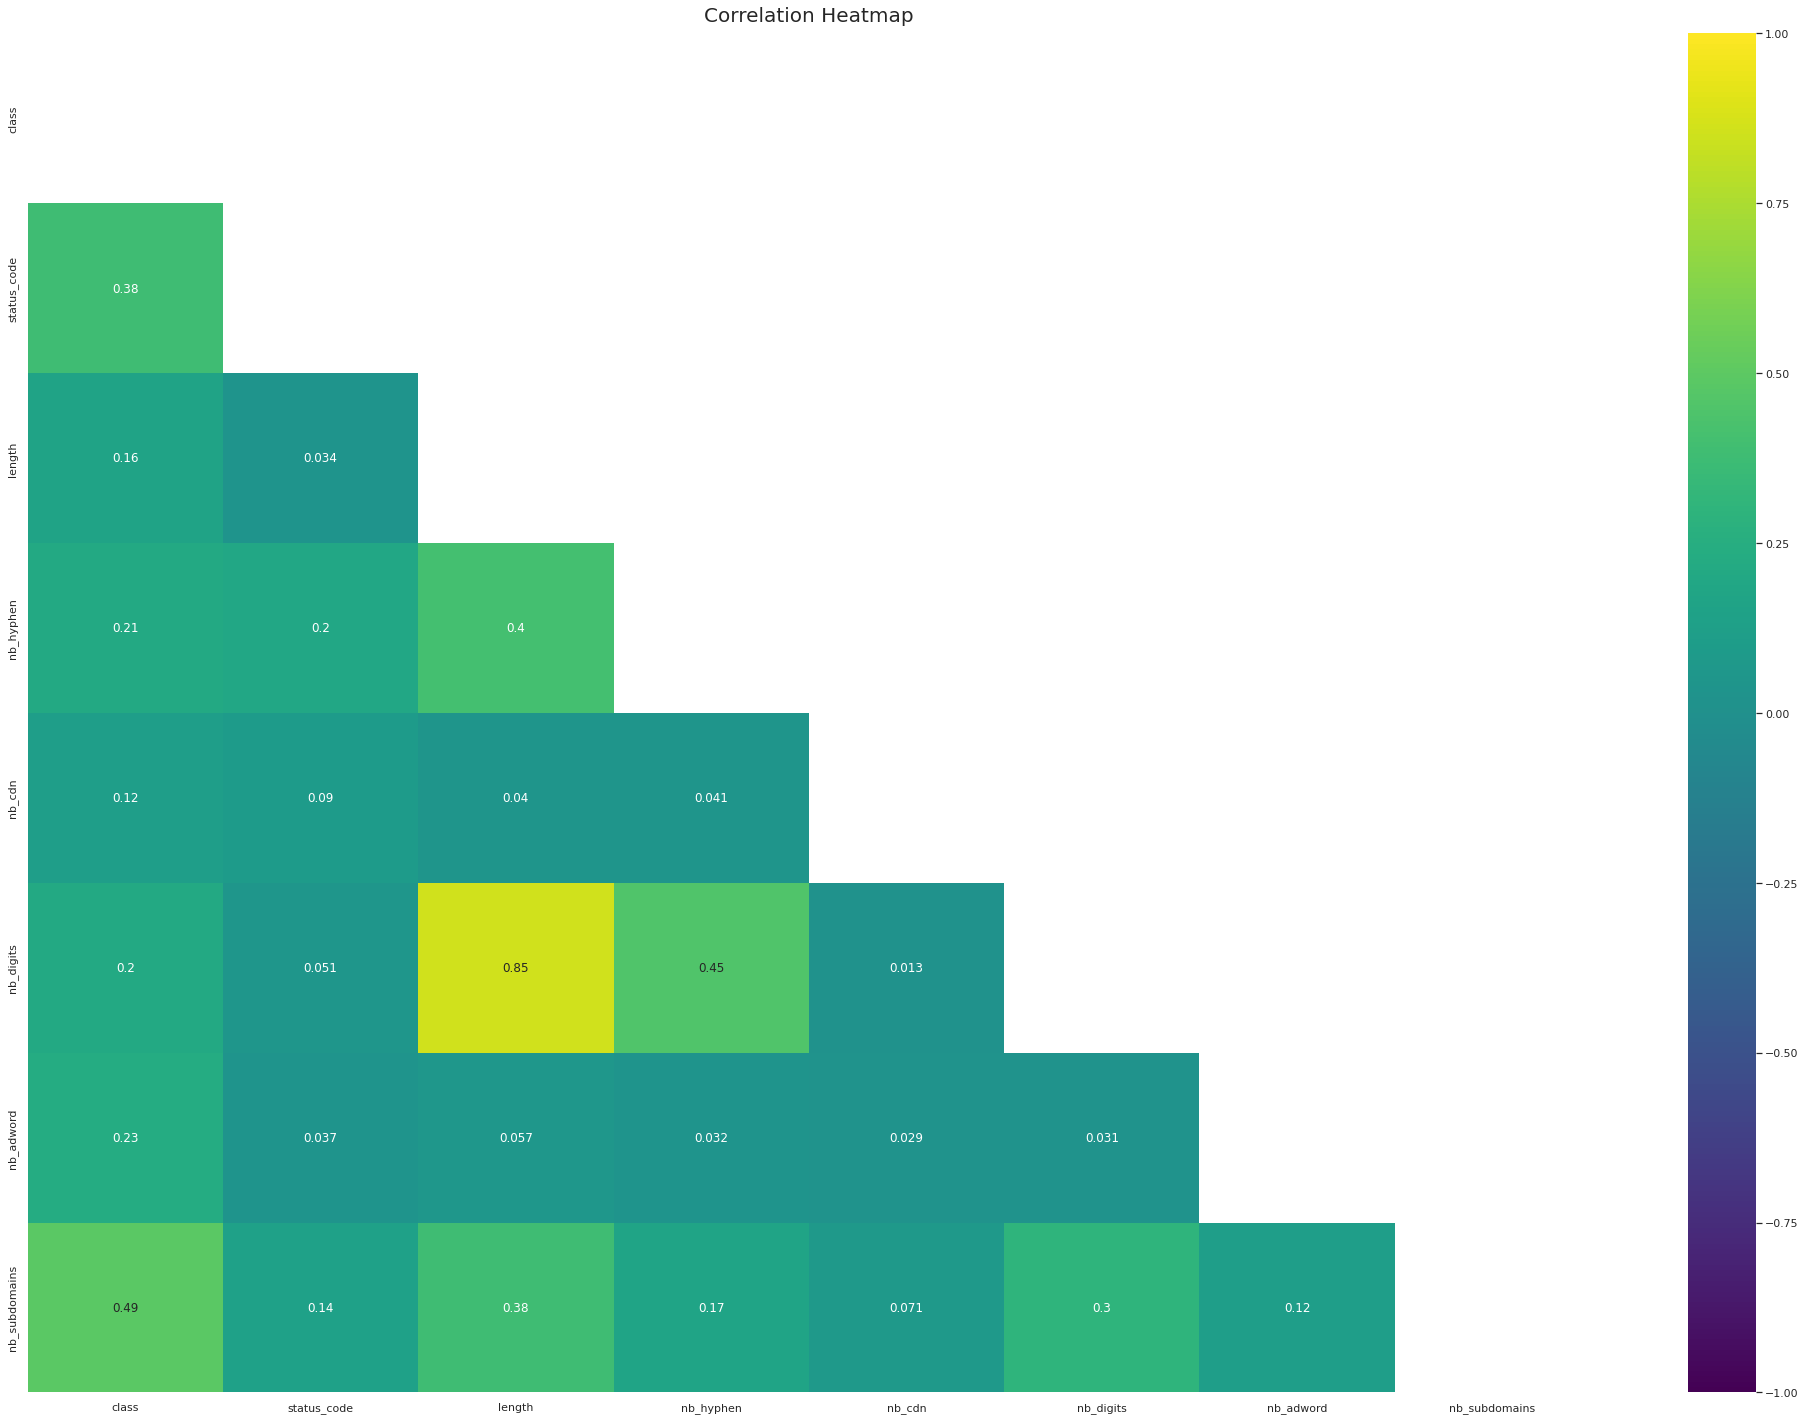

In [59]:
plt.figure(figsize=(35, 25))
corr = df.corr()
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
plt.savefig('../graphs/heatmap.png', dpi=300, bbox_inches='tight')

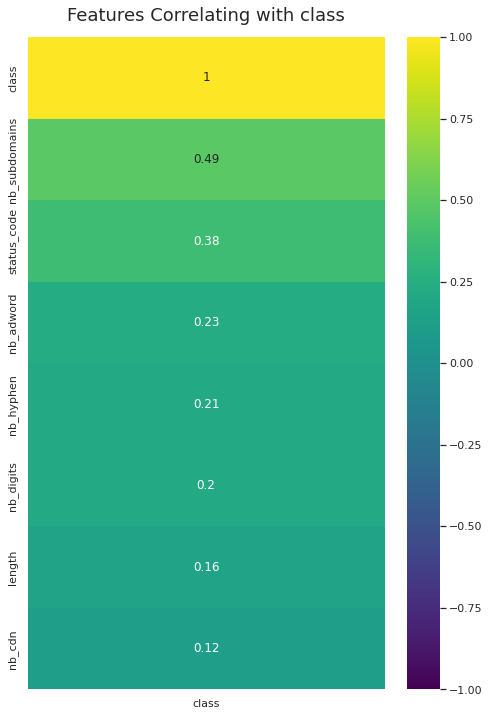

In [60]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with class', fontdict={'fontsize':18}, pad=16);
plt.savefig('../graphs/heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [102]:
df.columns

Index(['class', 'url', 'status_code', 'meta_info', 'length', 'nb_hyphen',
       'nb_cdn', 'nb_digits', 'nb_adword', 'nb_subdomains'],
      dtype='object')

In [51]:
num_cols = ['length','nb_hyphen','nb_cdn', 'nb_digits', 'nb_adword', 'nb_subdomains']

df_distr = df.groupby('class')[num_cols].mean().reset_index().T

df_distr.rename(columns={0:'0',1:"1"}, inplace=True)

df_distr = (df_distr-df_distr.mean())/df_distr.std() * -1

In [52]:
df_distr

,0,1
class,0.392810,0.365784
length,-2.267448,-2.263569
nb_hyphen,0.380645,0.411550
nb_cdn,0.392784,0.445391
nb_digits,0.369960,0.266713
nb_adword,0.387754,0.431412
nb_subdomains,0.343495,0.342719


In [126]:
sc = StandardScaler()

sc.fit_transform(df[['length','nb_subdomains']])

array([[-0.30969027, -1.00904909],
       [-0.26493105, -1.00904909],
       [ 0.22742037,  0.23535255],
       ...,
       [ 0.22742037,  0.23535255],
       [-0.26493105, -1.00904909],
       [-0.22017183, -1.00904909]])

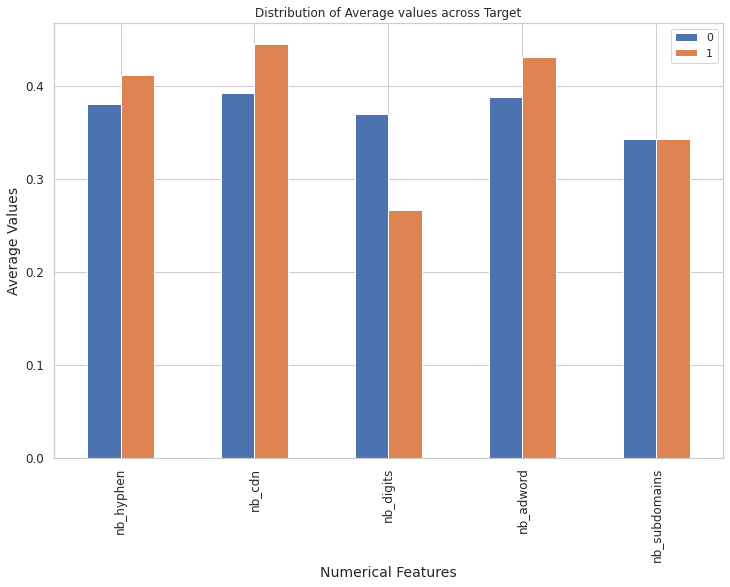

In [58]:

#plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
ax = df_distr[2:][['0','1']].plot(kind='bar', title ="Distribution of Average values across Target", figsize=(12, 8), legend=True, fontsize=12)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
#x.set_ylim(0,0.8)
plt.show()

In [3]:
df

,class,url,status_code,meta_info,length,nb_hyphen,nb_cdn,nb_digits,nb_adword,nb_subdomains
0,0,https://crowdyfan.com/,200,Crowdyfan Sports News Nutrition More,22,0,0,0,0,0
1,0,https://dreamaways.com/,403,403 Forbidden,23,0,0,0,0,0
2,0,https://www.worldtravelserver.com/,200,London travel agencies United Kingdom weather ...,34,0,0,0,0,1
3,0,https://www.baarty.com/,200,Soluciones Para Bares Baartycom,23,0,0,0,0,1
4,0,https://ladamotors63.ru/,200,Lada Motors,24,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...
74193,1,https://www.deloittedigital.com.mt,200,Digital Transformation Services Deloitte Digi...,34,0,0,0,0,2
74194,1,http://www.allstarmediagroup.com/,200,AllStar Media Group Worldwide Leader in Onlin...,33,0,0,0,0,1
74195,1,http://www.european-toplist.de/de/,200,EuropeanToplistde,34,1,0,0,0,1
74196,1,https://fpctraffic.com/,200,FPCTraffic Monetize your site Make the most ...,23,0,0,0,0,0


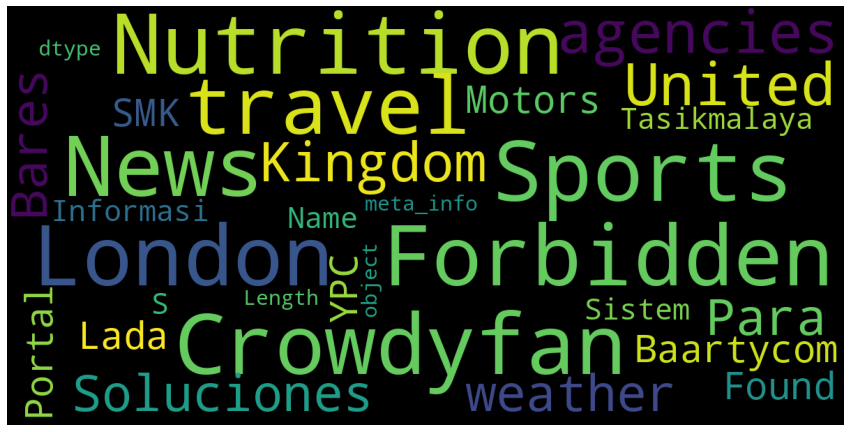

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['meta_info'][df['class'] == 0])

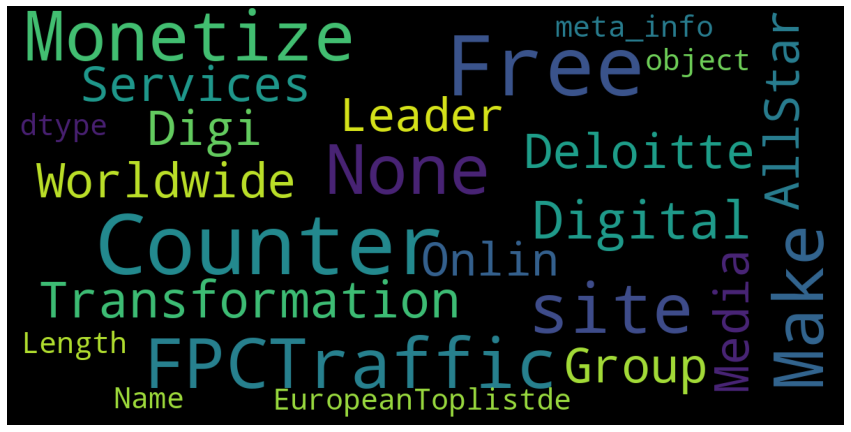

In [10]:
show_wordcloud(df['meta_info'][df['class'] == 1])

In [12]:
count_class_1_keywords = df[df['class'] == 1].groupby(['class']).count().sort_values(by = 'class', ascending = False)[:30]
count_class_0_keywords = df[df['class'] == 0].groupby(['class']).count().sort_values(by = 'class', ascending = False)[:30]

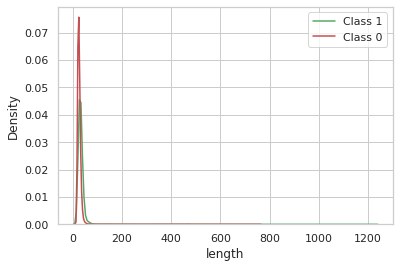

In [19]:
sns.kdeplot(df[df['class']==1]['length'],color='g')
sns.kdeplot(df[df['class']==0]['length'],color='r')
plt.legend(['Class 1','Class 0'])